In [1]:
from estival.model import BayesianCompartmentalModel
from estival import targets as est

import tbh.runner_tools as rt
from tbh.model import get_tb_model
from tbh.plotting import visualise_mle_params, plot_single_fit

In [2]:
params, priors, tv_params = rt.get_parameters_and_priors()
model = get_tb_model(rt.DEFAULT_MODEL_CONFIG, tv_params)
bcm = BayesianCompartmentalModel(model, params, priors, rt.targets)

In [3]:
import nevergrad as ng
from estival.wrappers.nevergrad import optimize_model

In [4]:
opt_class = ng.optimizers.NGOpt
orunner = optimize_model(bcm, opt_class=opt_class)
rec = orunner.minimize(2000)

In [5]:
mle_params = rec.value[1]
mle_params
res = bcm.run(mle_params)

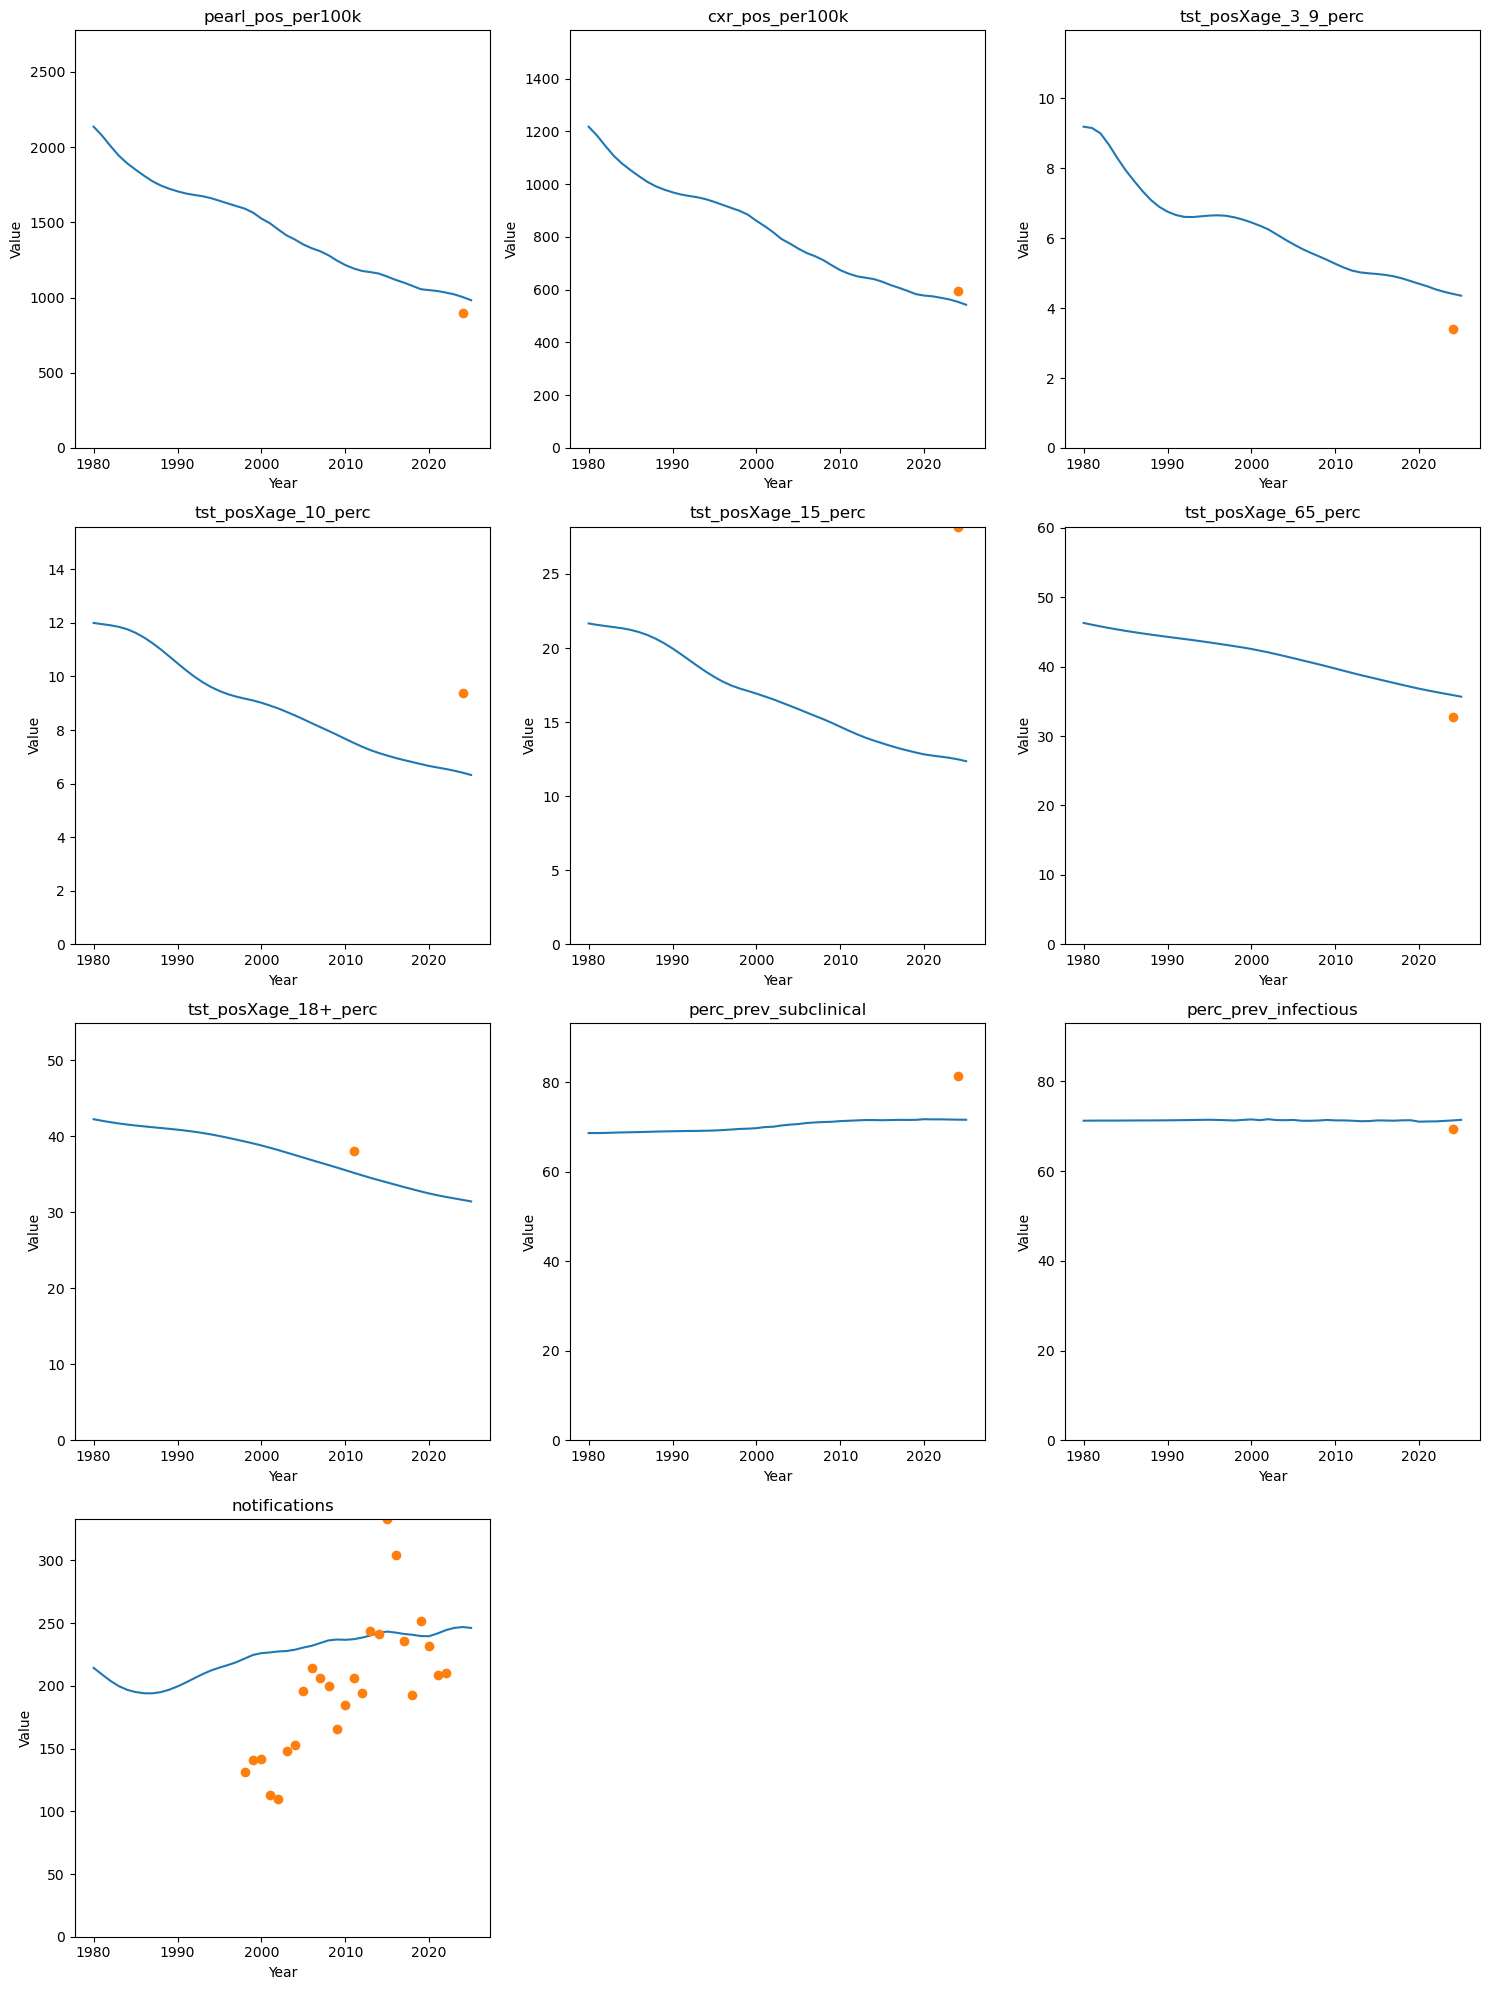

In [6]:
plot_single_fit(bcm, mle_params)

In [ ]:
res.derived_outputs['population'].plot()

In [ ]:
year = 2025
deno = res.derived_outputs['tb_prevalence'].loc[year]
for state in ["subclin_lowinf", "clin_lowinf", "subclin_inf", "clin_inf"]:
    prev = res.derived_outputs[f"prev_{state}"].loc[year]
    print(f"% {state}: {round(100 * prev / deno)}")

In [ ]:
year = 2025
deno = res.derived_outputs['tbi_prevalence'].loc[year]
for state in ["incipient", "contained", "cleared"]:
    prev = res.derived_outputs[f"prev_{state}"].loc[year]
    print(f"% {state}: {round(100 * prev / deno)}")

In [ ]:
# 0.5: {'raw_transmission_rate': 0.000248617743785965,
# 1: 'raw_transmission_rate':    0.00008


In [7]:
mle_params

{'raw_transmission_rate': 7.876433937098035e-05,
 'rel_sus_contained': 0.339605814963979,
 'rel_sus_cleared': 0.7683946862276433,
 'breakdown_rate': 0.47454536062612235,
 'clearance_rate': 0.06106717347572873,
 'clinical_progression_rate': 1.2797904436940042,
 'infectiousness_gain_rate': 3.3290752127389567,
 'recent_detection_rate': 1.9297497574693825,
 'prev_se_cleared': 0.3576651853314315,
 'prev_se_subclin_lowinf_cxr': 0.07724554818095325,
 'prev_se_subclin_inf_cxr': 0.49849823797931125,
 'passive_detection_inflection': 2002.5890677797406,
 'passive_detection_shape': 0.128990580803873,
 'passive_detection_past_frac': 0.786699387875917}

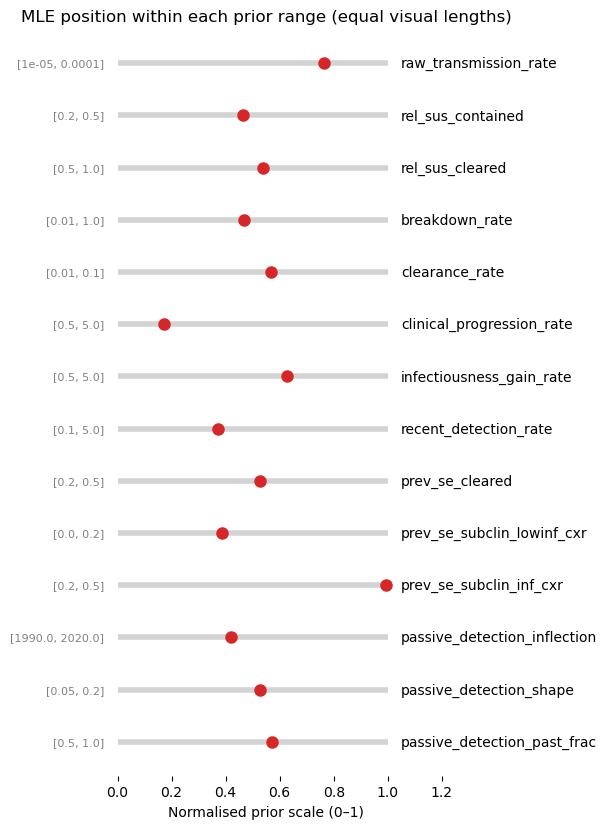

In [8]:
visualise_mle_params(bcm.priors, mle_params)